Віршило Михайло ЛАБ 4

Task 1 - Для кожного завдання повинна бути сформульована гіпотеза. Alpha = 0.05. Згенеруйте дві незалежні вибірки розміром 30 та 35 значень відповідно з нормального розподілу, з різними середніми значеннями, але однаковою дисперсією. Використовуючи критерій Стьюдента для незалежних вибірок, перевірте, чи існує статистично значуща різниця між середніми значеннями цих вибірок.

In [8]:
import numpy as np
from scipy import stats

# Нульова гіпотеза (H0): статистично значущої різниці між середніми значеннями вибірок не існує.
# Альтернативна гіпотеза (H1): статистично значуща різниця між середніми значеннями вибірок існує.

alpha = 0.05  
mu1 = 50  
mu2 = 70  
sigma = 10  
df = 30 + 35 - 2

sample1 = np.random.normal(loc=mu1, scale=sigma, size=30)  
sample2 = np.random.normal(loc=mu2, scale=sigma, size=35)  
t_critical = stats.t.ppf(1 - alpha/2, df)
t_stat, p_value = stats.ttest_ind(sample1, sample2)

print(f"t-статистика: {t_stat}, P-value: {p_value}, t-критичне: {t_critical}")


if p_value < alpha and t_stat < t_critical:
    print("Відхиляємо нульову гіпотезу. Існує статистично значуща різниця між середніми вибірок.")
else:
    print("Не відхиляємо нульову гіпотезу. Статистично значущої різниці між середніми вибірок не виявлено.")


t-статистика: -8.861636252720826, P-value: 1.124295359180662e-12, t-критичне: 1.998340542520741
Відхиляємо нульову гіпотезу. Існує статистично значуща різниця між середніми вибірок.


Task 2 - Завантажте датасет з яким ви будете працювати. Можете обрати самостійно.

In [9]:
import pandas as pd

data = pd.read_csv('dataset.csv')
data.dropna(inplace=True)
data.head()

,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07


Task 3 - Попарно порівняти ЧИСЛОВІ характеристики та ознаки застосовуючи критерій Стюдента. Визначити найбільш корелюючі ознаки (перевіряти гіпотезу щодо кореляції ознак між собою).

Comparison for open:
t-statistic: 36.443531429293586, p-value: 9.576841177324214e-265
Statistically significant difference 
--------------------------------------------------
Comparison for high:
t-statistic: 36.44692019108069, p-value: 8.642899687670623e-265
Statistically significant difference 
--------------------------------------------------
Comparison for low:
t-statistic: 36.484721178951496, p-value: 2.7503302126447466e-265
Statistically significant difference 
--------------------------------------------------
Comparison for close:
t-statistic: 36.46846058074835, p-value: 4.5012771080010407e-265
Statistically significant difference 
--------------------------------------------------
Comparison for volume:
t-statistic: 33.442240874828755, p-value: 2.1956141575537628e-226
Statistically significant difference 
--------------------------------------------------
Comparison for marketCap:
t-statistic: 34.984744395009685, p-value: 8.071091103485301e-246
Statistically significant diffe

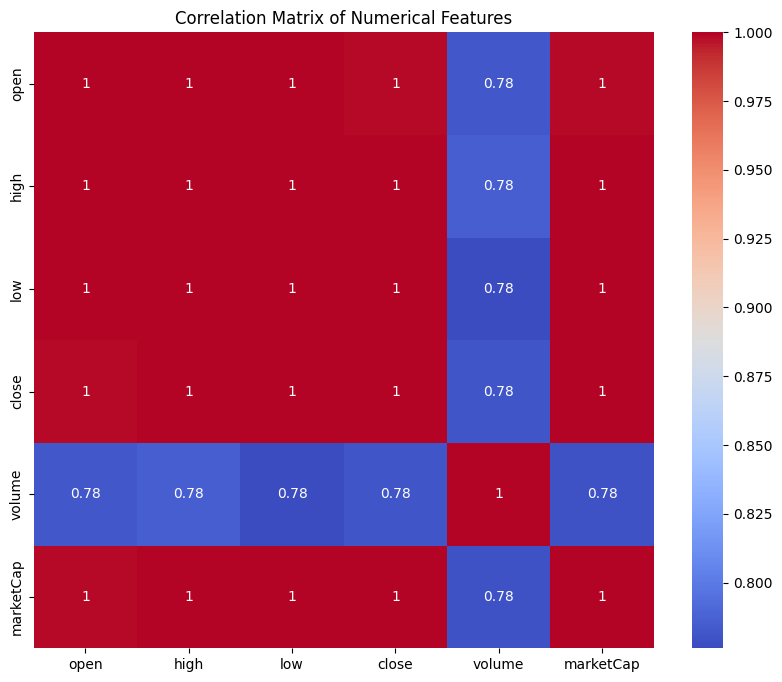

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

bitcoin_data = data[data['crypto_name'] == 'Bitcoin']
litecoin_data = data[data['crypto_name'] == 'Litecoin']
numerical_columns = ['open', 'high', 'low', 'close', 'volume', 'marketCap']
bitcoin_data = bitcoin_data[numerical_columns].dropna()  
litecoin_data = litecoin_data[numerical_columns].dropna()

alpha = 0.05  

for col in numerical_columns:
    t_stat, p_value = stats.ttest_ind(bitcoin_data[col], litecoin_data[col])
    print(f"Comparison for {col}:")
    print(f"t-statistic: {t_stat}, p-value: {p_value}")
    
    if p_value < alpha:
        print("Statistically significant difference ")
    else:
        print("No statistically significant difference ")
    print("-" * 50)

combined_data = pd.concat([bitcoin_data, litecoin_data], axis=0)
correlation_matrix = combined_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Features")
plt.show()

Task 4 -Виберіть дві числові змінні, між якими можлива кореляція. Виконайте аналіз кореляції, використовуючи коефіцієнт Пірсона, щоб оцінити силу та напрямок зв’язку. Побудуйте графік розсіювання для візуалізації кореляції та сформулюйте висновки

Pearson Correlation Coefficient: 0.9992267026137439, P-value: 0.0


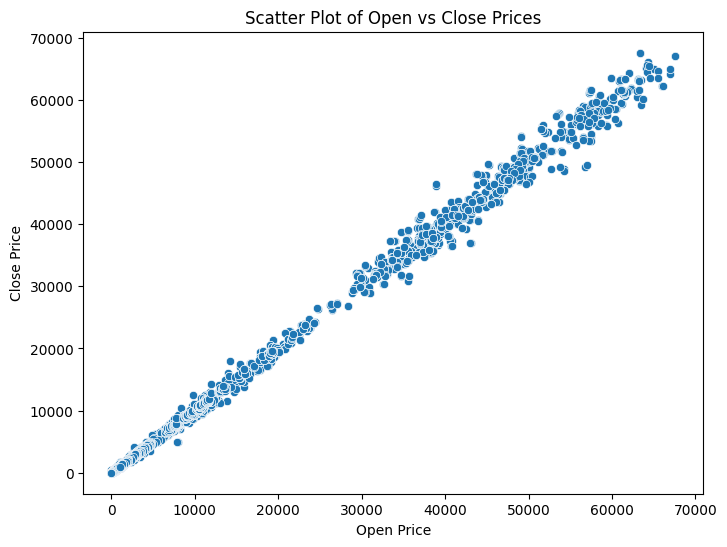

The correlation is statistically significant.
The correlation is positive, with a coefficient of 1.00.


In [11]:
from scipy.stats import pearsonr

data = pd.DataFrame(data, columns=['open', 'high', 'low', 'close', 'volume', 'marketCap' ,"crypto_name"])

x = data['open']
y = data['close']

corr_coefficient, p_value = pearsonr(x, y)
print(f"Pearson Correlation Coefficient: {corr_coefficient}, P-value: {p_value}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=x, y=y)
plt.title('Scatter Plot of Open vs Close Prices')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.show()

if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

if corr_coefficient > 0:
    print(f"The correlation is positive, with a coefficient of {corr_coefficient:.2f}.")
elif corr_coefficient < 0:
    print(f"The correlation is negative, with a coefficient of {corr_coefficient:.2f}.")
else:
    print("There is no linear correlation.")


Task 5 - Побудуйте таблицю спряженості на основі двох категорійних ознак, які мають по кілька рівнів. Перевірте, чи існує статистично значущий зв’язок між цими ознаками, використовуючи критерій хі-квадрат. Поясніть, які висновки можна зробити щодо залежності між цими ознаками.

In [ ]:
from scipy.stats import chi2_contingency

data['crypto_category'] = data['crypto_name'].apply(lambda x: 'Bitcoin' if x == 'Bitcoin' else 'Altcoin')

data['marketCap_category'] = pd.cut(data['marketCap'], 
                                    bins=[0, 1e9, 1e10, float('inf')], 
                                    labels=['Low', 'Medium', 'High'])

sampled_data = data.sample(frac=0.1, random_state=42)

contingency_table_sampled = pd.crosstab(sampled_data['crypto_category'], sampled_data['marketCap_category'])
chi2_stat_sampled, p_value_sampled, dof_sampled, expected_sampled = chi2_contingency(contingency_table_sampled)
print("Contingency Table (Sampled Data):")
print(contingency_table_sampled)
print(f"Chi-Square Test Results: {chi2_stat_sampled}, p-value: {p_value_sampled}, Degrees of Freedom: {dof_sampled}")

alpha = 0.05
if p_value_sampled < alpha:
    print("There is a statistically significant relationship between the two categorical variables.")
else:
    print("There is no statistically significant relationship between the two categorical variables.")

Contingency Table (Sampled Data):
marketCap_category   Low  Medium  High
crypto_category                       
Altcoin             3062    2728   952
Bitcoin                2     122   184
Chi-Square Test Results: 516.3008583180247, p-value: 7.703589193758857e-113, Degrees of Freedom: 2
There is a statistically significant relationship between the two categorical variables.


Task 6 - Згенеруйте вибірку з 50 значень. Використайте критерій Шапіро-Вілка, щоб перевірити, чи дані мають нормальний розподіл. Поясніть, як цей тест може вплинути на вибір подальших статистичних методів аналізу.

Статистика Шапіро-Вілка: 0.9850419979615769 P-value: 0.7734099358830064


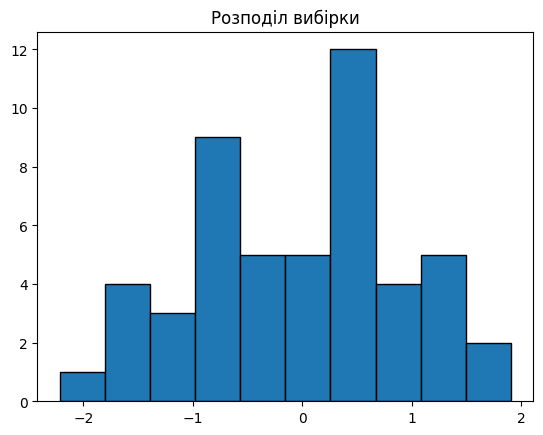

Дані мають нормальний розподіл


In [ ]:
data = np.random.normal(size=50)
statistic, p_value = stats.shapiro(data)
print(f"Статистика Шапіро-Вілка: {statistic} P-value: {p_value}")

plt.hist(data, bins=10, edgecolor='black')
plt.title('Розподіл вибірки')
plt.show()

if p_value > 0.05:
    print("Дані мають нормальний розподіл")
else:
    print("Дані не мають нормального розподілу")
